In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [33]:
import os
import sys
import cv2
sys.path.append('..')
from chessvision.util import *
os.environ[STORAGE_ENV] = "/home/calum/Documents/uni/chess-vision/games"
from chessvision.game import *
from chessvision.label import *

## Load Game

In [36]:
game = Game("Kasparov", 0)
moves = list(game.images)
len(moves)

84

**Careful running the following block**

In [37]:
# with open(f"{Storage.dir}/{game.pkl_file}", "rb") as pkl_wb_obj:
#     recorded_moves = pickle.load(pkl_wb_obj)

# overwrite = [moves[5], *moves[8:]]
# overwrite = moves[7:]

# with open(f"/home/calum/Documents/uni/chess-vision/games/poop_0.pkl", "wb") as pkl_wb_obj:
#     for move in overwrite:
#         pickle.dump(move, pkl_wb_obj)

## Visualise Game

In [88]:
margin = 0
move = 20

In [87]:
from chessvision import aruco
aruco._detect("board.jpg", "sample_img.jpg")

found [[3]
 [1]] and got 25 rejected points


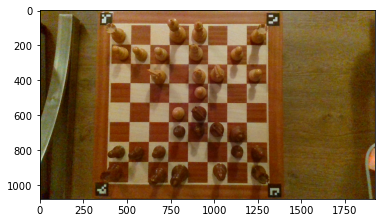

In [89]:
img = moves[move]["color"]
cv2.imwrite('board.jpg', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [90]:
corners = find_corners(game.images)
corners

array([[ 391.74734,  983.5767 ],
       [1304.7764 ,  990.533  ],
       [ 414.30853,   86.03298],
       [1297.0002 ,   89.06176]], dtype=float32)

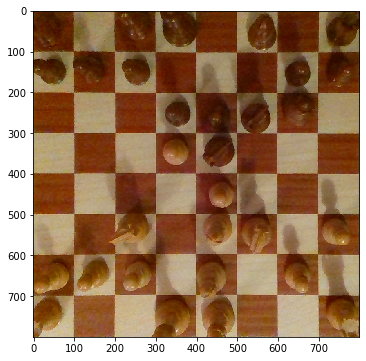

In [91]:
board = get_board(img, corners, game.options)
plt.figure(figsize=(6,6))
plt.imshow((cv2.cvtColor(board, cv2.COLOR_BGR2RGB)), interpolation='nearest')
cv2.imwrite("segmented_board.jpg", board)
plt.show()

In [120]:
opts = LabelOptions(margin=-5, flipped=True)
board = get_board(img, corners, opts)

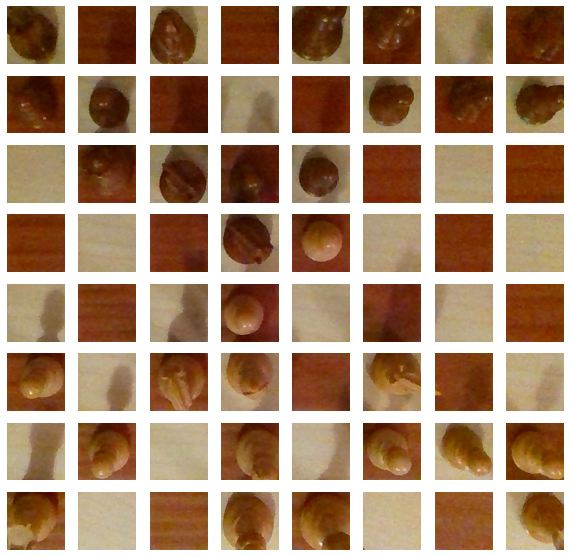

In [121]:
plt.figure(figsize=(10,10))
for i, square in enumerate(get_squares((cv2.cvtColor(board, cv2.COLOR_BGR2RGB)), opts)):
    plt.subplot(8, 8, 64-i)
    plt.imshow(square)
    plt.axis("off")
plt.savefig('separated.png', bbox_inches='tight')

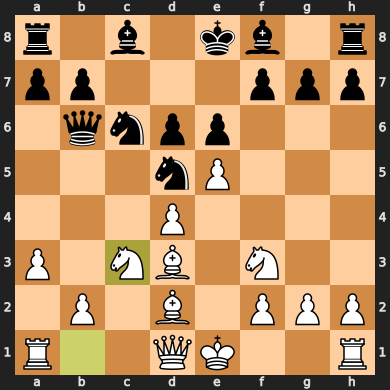

In [109]:
from cairosvg import svg2png
fen = list(iter(game.pgn.mainline()))[move-2].board()
svg2png(fen._repr_svg_(), write_to='fen.png')
fen

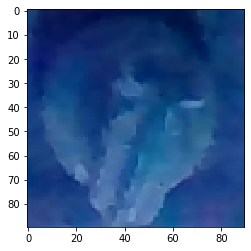

In [112]:
pgn_move = list(iter(game.pgn.mainline()))[move-2]
piece_img, piece = label_move(pgn_move.board(), board, pgn_move.move.to_square, opts=opts)
cv2.imwrite('square.jpg', piece_img)
plt.imshow(piece_img, interpolation='nearest')
plt.show()

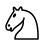

In [111]:
svg2png(piece._repr_svg_(), write_to='piece.png')
piece